Here, we are analysing the recorded data of accidents in India from the year 2001 to 2014. This data is publicly available.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as display
import plotly.graph_objs as go

In [3]:
# Read the data to the dataframe from the data files.

#state_year_month_df contains data for each state, segragated into year and month
state_year_month_df=pd.read_csv('only_road_accidents_data_month2.csv')

#state_year_time_df contains data for each state, segragated into year and time of the day
state_year_time_df=pd.read_csv('only_road_accidents_data3.csv')

In [4]:
state_year_month_df.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [5]:
state_year_time_df.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [6]:
#Get all the state names in an array..
state_names = state_year_month_df['STATE/UT'].unique()
print(state_names)

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'D&N Haveli' 'Daman & Diu'
 'Delhi (Ut)' 'Delhi Ut' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


We can see from the above list that the states - Delhi, Dadra & Nagar Haveli has appeared with multiple names. So, we will make their names uniform.

In [7]:
#state_year_month_df=state_year_month_df['STATE/UT']
state_year_month_df['STATE/UT']=state_year_month_df['STATE/UT'].replace({'Delhi (Ut)': 'Delhi Ut', 'D & N Haveli':'D&N Haveli'})
print(state_year_month_df['STATE/UT'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D&N Haveli' 'Daman & Diu' 'Delhi Ut' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


In [8]:
# Reassiging state names to variable..
state_names=state_year_month_df['STATE/UT'].unique()

Feature Engineering

Feature engineering 1: Clubbing month columns into seasons</I>
Our data contains breakup of accident figures for every state and every month, since 2001 till 2014. We considered, clubbing monthly data to seasonal data, as monthly details is not required.

In [9]:
#display(state_year_month_df.head())

#Create season groups clubbing values from multiple month columns..
state_year_month_df['SUMMER']=state_year_month_df[['JUNE','JULY','AUGUST']].sum(axis=1)
state_year_month_df['AUTUMN']=state_year_month_df[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
state_year_month_df['WINTER']=state_year_month_df[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
state_year_month_df['SPRING']=state_year_month_df[['MARCH','APRIL','MAY']].sum(axis=1)

#Delete month columns..
state_year_month_df=state_year_month_df.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
#Create groups of states, summing the values of accident number for each year..
state_grouped=state_year_month_df.groupby(['STATE/UT']).sum()

#Create % columns for noting the % of accidents happening in each state for each season..
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']

display(state_grouped.iloc[:,1:].head())

,TOTAL,SUMMER,AUTUMN,WINTER,SPRING,%_SUMMER,%_AUTUMN,%_WINTER,%_SPRING
STATE/UT,,,,,,,,,
A & N Islands,2893,689,710,779,715,0.238161,0.245420,0.269271,0.247148
Andhra Pradesh,546821,132891,129230,138633,146067,0.243025,0.236330,0.253525,0.267120
Arunachal Pradesh,3389,748,875,920,846,0.220714,0.258188,0.271467,0.249631
Assam,61718,14696,15382,15671,15969,0.238115,0.249230,0.253913,0.258741
Bihar,92648,23506,20866,21994,26282,0.253713,0.225218,0.237393,0.283676


Over the day accident breakup : Merge columns into categories - 'Night', 'Day', 'Afternoon', 'Evening'

In [10]:
#Working on the over the day data...
state_year_time_df.rename(columns={'0-3 hrs. (Night)':'0-3',
                              '3-6 hrs. (Night)':'3-6',
                                '6-9 hrs (Day)':'6-9', '9-12 hrs (Day)':'9-12','12-15 hrs (Day)':'12-15','15-18 hrs (Day)':'15-18',
                                  '18-21 hrs (Night)':'18-21','21-24 hrs (Night)':'21-24'}, inplace=True)
state_time_grouped=state_year_time_df.groupby(['STATE/UT']).sum()

state_time_grouped['%_MORNING']=(state_time_grouped['6-9']+state_time_grouped['9-12'])/state_time_grouped['Total']
state_time_grouped['%_AFTERNOON']=(state_time_grouped['12-15']+state_time_grouped['15-18'])/state_time_grouped['Total']
state_time_grouped['%_EVENING']=(state_time_grouped['18-21']+state_time_grouped['21-24'])/state_time_grouped['Total']
state_time_grouped['%_NIGHT']=(state_time_grouped['0-3']+state_time_grouped['3-6'])/state_time_grouped['Total']

state_time_grouped=state_time_grouped.drop(state_time_grouped.columns[0:9], axis=1)
display(state_time_grouped.head())

,Total,%_MORNING,%_AFTERNOON,%_EVENING,%_NIGHT
STATE/UT,,,,,
A & N Islands,2893,0.297961,0.402351,0.260283,0.039405
Andhra Pradesh,546821,0.243550,0.266599,0.281997,0.207854
Arunachal Pradesh,3389,0.291531,0.383889,0.213927,0.110652
Assam,61718,0.370556,0.363022,0.172510,0.093911
Bihar,92648,0.304853,0.299855,0.208423,0.186869


Digging into the data to find patterns


First, lets see the seasonal distribution of accidents over the years, and for all the states taken together

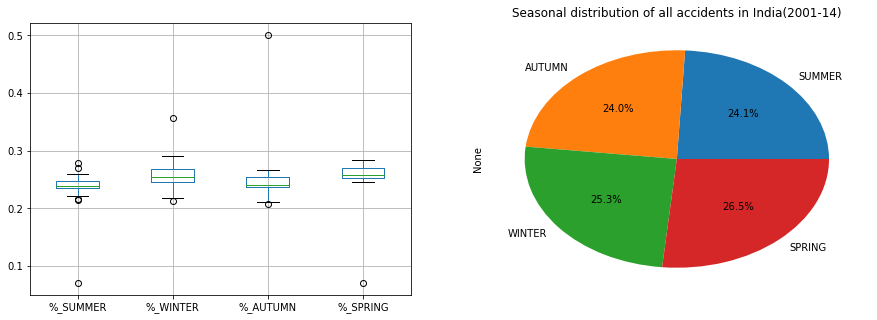

In [11]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
boxplot=state_grouped.boxplot(ax=ax,column=['%_SUMMER','%_WINTER','%_AUTUMN','%_SPRING'])

ax=plt.subplot(1,2,2)
state_grouped.loc[:,'SUMMER':'SPRING'].sum(axis=0).plot.pie(title='Seasonal distribution of all accidents in India(2001-14)',autopct='%1.1f%%')

INTERPRETATION:

From the boxplot it is evident that the median % of accidents is slightly high for winter and spring. Moreover, summer and spring are having more even distribution of accidents %. Outliers are high for summer.

Second plot(Pie plot) gives a general impression that accidents are nearly uniform over the seasons.

Lets find out the states with highest percentage accidents in different seasons
Each plot depicts a season with the states with highest % of accidents in that season.

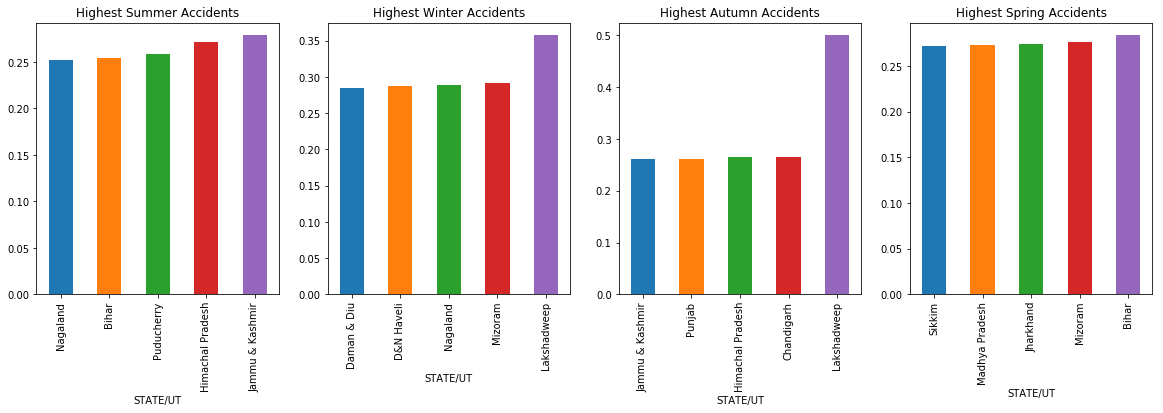

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(141)
summer_sorted=state_grouped.sort_values('%_SUMMER')
summer_sorted['%_SUMMER'].tail(5).plot.bar(title='Highest Summer Accidents')
plt.subplot(142)
winter_sorted=state_grouped.sort_values('%_WINTER')
winter_sorted['%_WINTER'].tail(5).plot.bar(title='Highest Winter Accidents')
plt.subplot(143)
autumn_sorted=state_grouped.sort_values('%_AUTUMN')
autumn_sorted['%_AUTUMN'].tail(5).plot.bar(title='Highest Autumn Accidents')
plt.subplot(144)
spring_sorted=state_grouped.sort_values('%_SPRING')
spring_sorted['%_SPRING'].tail(5).plot.bar(title='Highest Spring Accidents')

What we can interpret:

For summer, the smaller states occupy the major positions. Same is for winter and autumn. For winter and autumn, Lakshadweep has high % of accidents. But , we can not make any interpretation as the overall number of accidents in Lakshwadeep is low. Some anomaly may be there. States with highesst spring time accidents share are almost at par.

Yearly progress of states with highest accidents

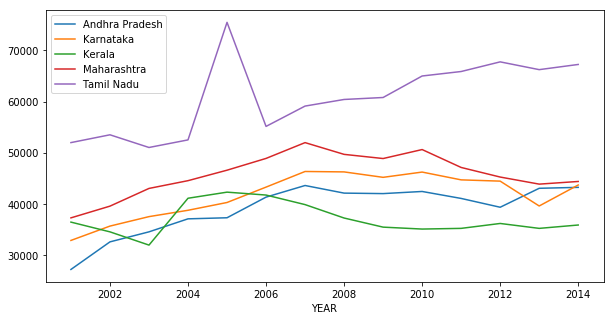

In [13]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
high_states=list(highest_accident_states.head().index)
df4=state_year_month_df.loc[state_year_month_df['STATE/UT'].isin(high_states),['STATE/UT','YEAR','TOTAL']]

plt.figure(figsize=(10,5))
ax=plt.subplot(111)
for key, grp in df4.groupby(['STATE/UT']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)
  
plt.show()

Working on over the day accident data..


Which are the states having highest number of accidents?

In [14]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
state_list=list(highest_accident_states.head().index)
print(state_list)

['Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Kerala']


States with highest accident numbers: 

How are accidents distributed over the day?

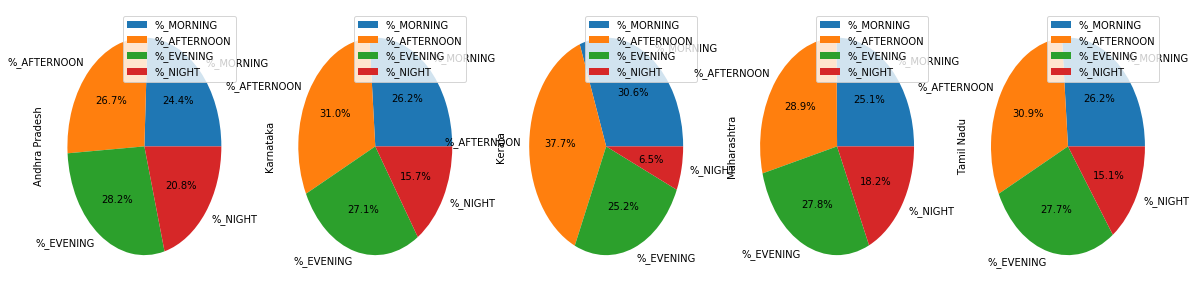

In [15]:
df=state_time_grouped.loc[state_time_grouped.index.isin(state_list)]

df_T=df.groupby('STATE/UT').sum().drop(['Total'], axis=1).T.plot.pie(subplots=True, figsize=(20, 5),autopct='%1.1f%%')

One observation: 

Kerala has high afternoon accidents, but low night time accidents. Other than that, we dont see any other interesting patterns.

Over the day distribution of all the accidents in India

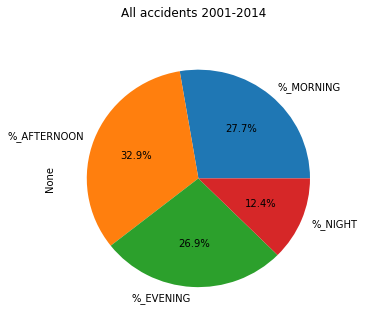

In [16]:
## Break up accidents for all states over the time blocks:
#state_time_grouped.info()
df2=state_time_grouped.sum(axis=0)



df2.drop(['Total']).T.plot.pie(title='All accidents 2001-2014',subplots=True, figsize=(5,5),autopct='%1.1f%%')

df2=state_time_grouped.sum(axis=0)

Interpretation:

For all the states, and for all the years, we can see the afternoon accidents occupy major portion, followed by morning, and closely followed by evening.

How has accidents in the country has grown over years

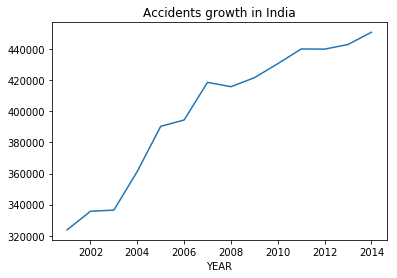

In [17]:
df3=state_year_time_df.groupby(['YEAR']).sum()
df3.loc[:,'Total'].plot(title='Accidents growth in India')

the accidents are always growing since 2001, but the rate of growth has declined in recent years. Good news!!

States with highest % accidents in different timeblocks

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



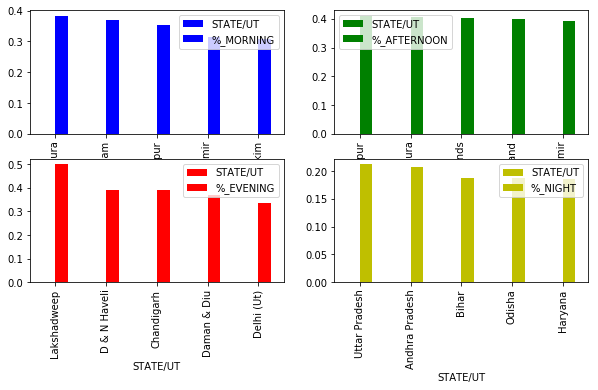

In [18]:
#See the states with highest % accident in the every timeblock..
plt.figure(figsize=(10,5))
state_time_grouped.sort_values('%_MORNING',ascending=False).head().loc[:,['STATE/UT','%_MORNING']].plot(kind='bar', ax=plt.subplot(221), color='b')
state_time_grouped.sort_values('%_AFTERNOON',ascending=False).head().loc[:,['STATE/UT','%_AFTERNOON']].plot(kind='bar', ax=plt.subplot(222),color='g')
state_time_grouped.sort_values('%_EVENING',ascending=False).head().loc[:,['STATE/UT','%_EVENING']].plot(kind='bar', ax=plt.subplot(223),color='r')
state_time_grouped.sort_values('%_NIGHT',ascending=False).head().loc[:,['STATE/UT','%_NIGHT']].plot(kind='bar', ax=plt.subplot(224),color='y')

Checking performance of states from 2001 to 2014

In [19]:
#Create a new dataframe - period_performance.
period_performance=pd.DataFrame(columns=['STATE/UT','%_CHANGE_2001_TO_2014'])

#Take one state name at a time,
for state in state_names:
    #print(state)
    total_2001=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2001), 'TOTAL']
    total_2014=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2014), 'TOTAL']
    value_2001=total_2001.iloc[0]
    value_2014=total_2014.iloc[0]
    change_in_percent= (value_2014-value_2001)*100/value_2001
   
    new_data=pd.Series({'STATE/UT':state, '%_CHANGE_2001_TO_2014':change_in_percent})
    period_performance=period_performance.append(new_data, ignore_index=True)

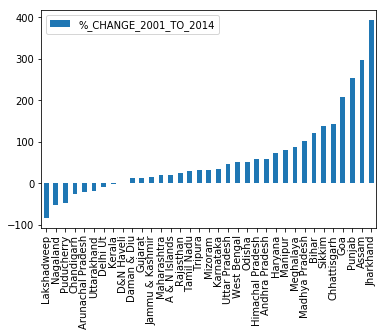

In [20]:
best_performing=period_performance.sort_values('%_CHANGE_2001_TO_2014')
#print(best_performing.head())
ax=best_performing.plot(kind='bar').set_xticklabels(best_performing['STATE/UT'])

Interpretation:
    
A few states/UTs have shown decrease in number of accidents. But, most of these states are smaller. Jharkhand, Assam and Punjab on the other hand are leading the states with high % increase of accidents from 2001 to 2014.

